In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

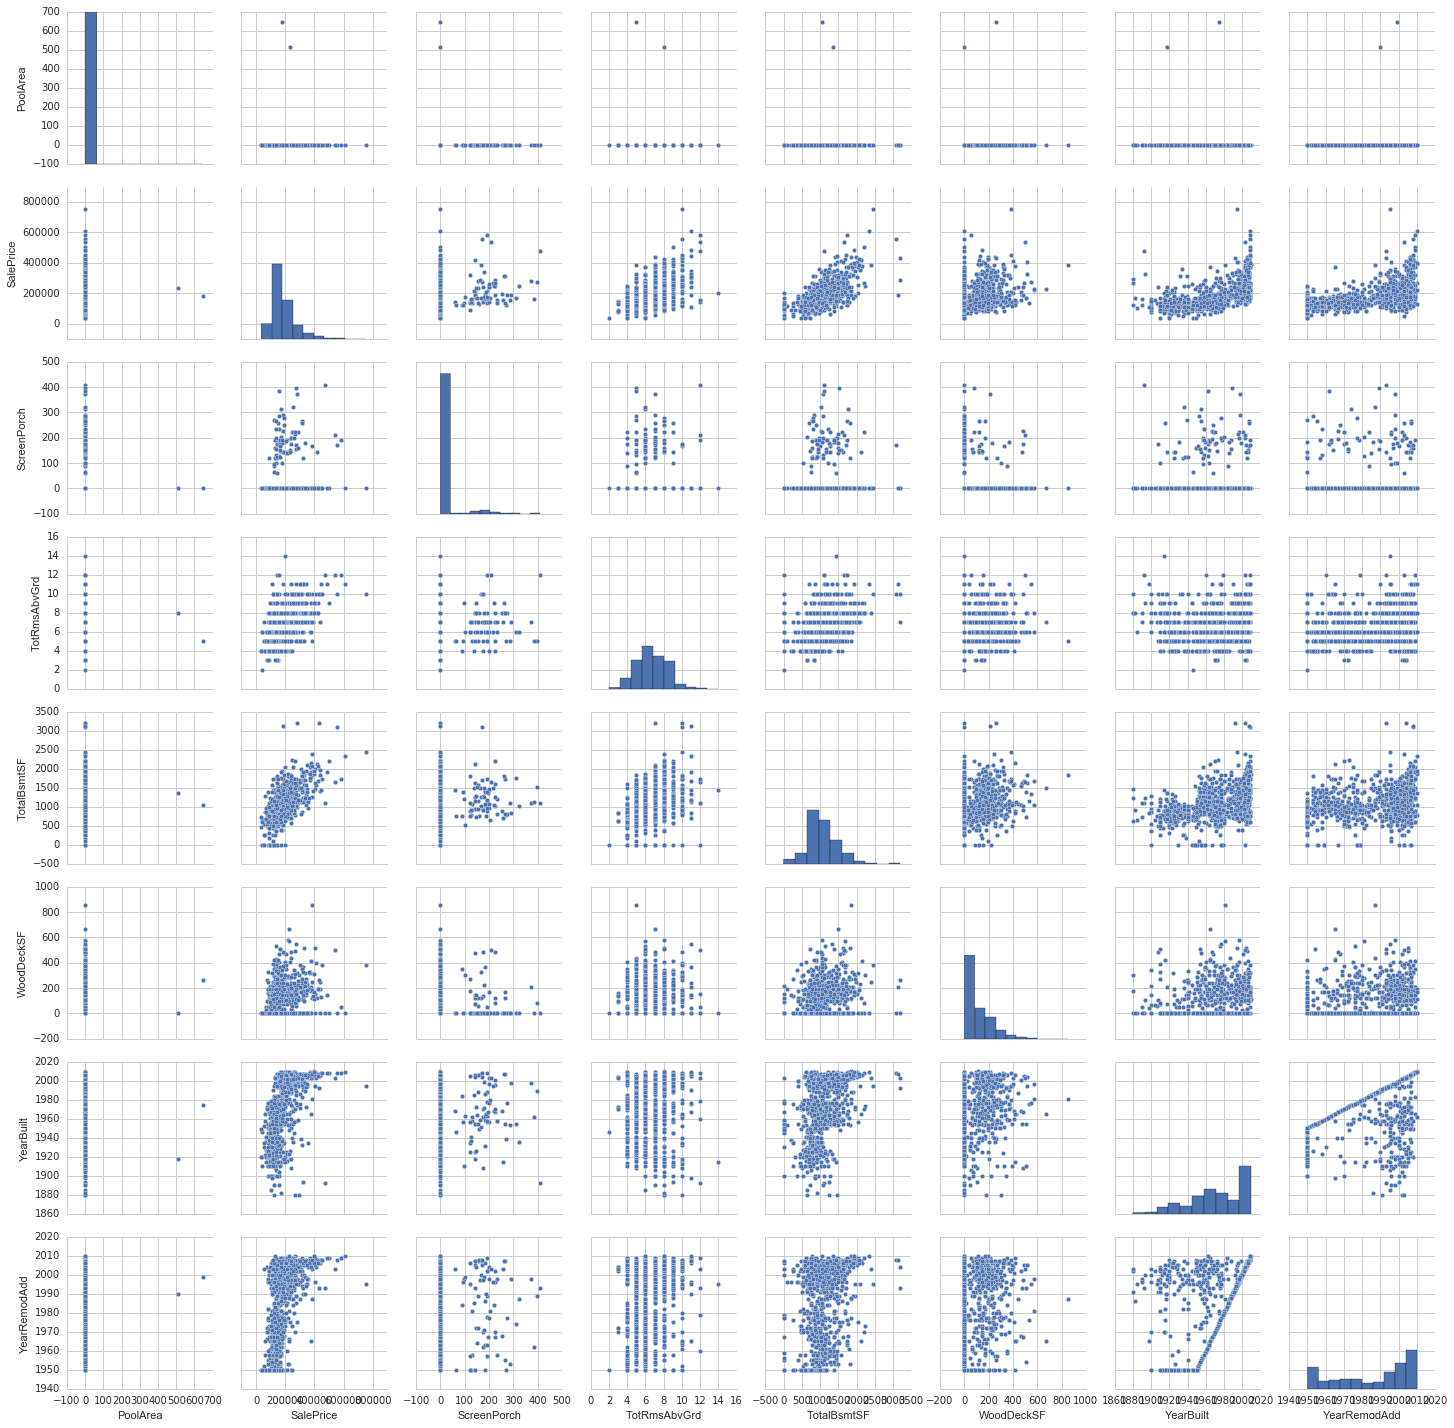

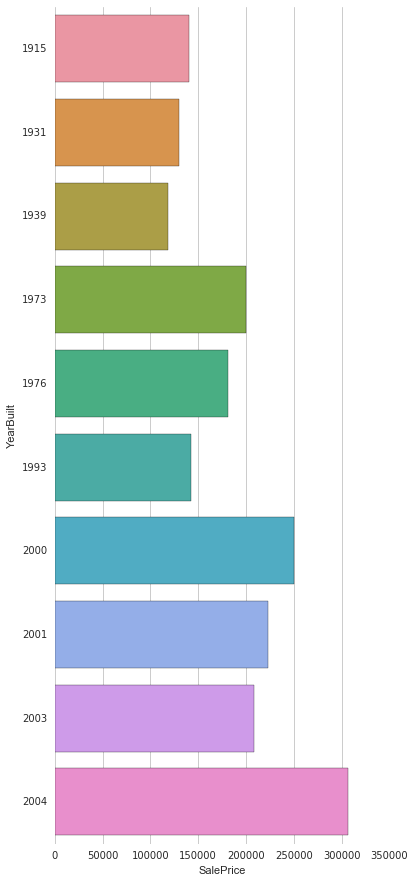

In [154]:
df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
from scipy.stats import skew 
df_numeric_columns=df.select_dtypes(exclude = ["object"])
plt.figure(figsize=(10,10))
sns.pairplot(data=df_numeric_columns[df_numeric_columns.columns.difference(["Id"])].iloc[:1000,-9:-1])
np.log(df_numeric_columns.SalePrice)
f, ax = plt.subplots(figsize=(6, 15))
sns.set(style="whitegrid")
sns.barplot(df_numeric_columns.SalePrice[:10] ,df_numeric_columns.YearBuilt[:10], orient="h")
sns.despine(left=True, bottom=True)

In [132]:
model=AdaBoostRegressor()


In [133]:
model.fit(X=np.reshape(df_numeric_columns[["LotArea","BedroomAbvGr","YearBuilt"]],(1460,3)),y=df_numeric_columns.SalePrice.values)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [134]:
model.predict(test_df[["LotArea","BedroomAbvGr","YearBuilt"]].iloc[500])

c:\python34\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 146443.37313433])

In [157]:
test_df[["LotArea","BedroomAbvGr","YearBuilt"]].iloc[500]

LotArea         7560
BedroomAbvGr       3
YearBuilt       1971
Name: 500, dtype: int64

In [156]:
df_numeric_columns[(df_numeric_columns.YearBuilt==1971) & (df_numeric_columns.BedroomAbvGr==3) & (df_numeric_columns.LotArea>= 7560) ][["LotArea","SalePrice"]]

,LotArea,SalePrice
140,10500,115000
287,8125,88000
487,12243,175000
574,10500,139000
645,10530,143250
818,8816,155000
1080,11040,145000
1101,9758,119500
1340,8294,123000
1357,12537,149900
